In [37]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
import sklearn as skl

In [38]:
from google.colab import files
uploaded = files.upload()
listing_df = pd.read_csv("listing_info.csv")

Saving listing_info.csv to listing_info (2).csv


In [39]:
listing_df.head()

,date,zip,lat,lng,state,city,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,2020-07-01,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,320000.0,30,182.0,1800.0,399248.0,51.0
1,2020-08-01,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,280000.0,27,175.0,1600.0,368038.0,51.0
2,2020-09-01,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,297450.0,23,174.0,1680.0,367193.0,62.0
3,2020-10-01,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,305000.0,42,173.0,1736.0,370583.0,94.0
4,2020-11-01,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,302500.0,44,173.0,1740.0,391833.0,93.0


In [40]:
listing_df["Month"] = listing_df["date"].str[8:10]
listing_df["Year"] = listing_df["date"].str[0:4]

In [ ]:
listing_df.head()

,zip,lat,lng,state,city,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,Month,Year
0,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,320000.0,30,182.0,1800.0,399248.0,51.0,01,2020
1,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,280000.0,27,175.0,1600.0,368038.0,51.0,01,2020
2,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,297450.0,23,174.0,1680.0,367193.0,62.0,01,2020
3,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,305000.0,42,173.0,1736.0,370583.0,94.0,01,2020
4,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,302500.0,44,173.0,1740.0,391833.0,93.0,01,2020


In [41]:
listing_df.drop(['date'], axis=1, inplace=True)

In [42]:
listing_df.columns

Index(['zip', 'lat', 'lng', 'state', 'city', 'population', 'density',
       'median_listing_price', 'median_days_on_market',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count', 'Month', 'Year'],
      dtype='object')

In [43]:
# Rearrange the columns
listing_df=listing_df[['Month', 'Year', 'zip', 'lat', 'lng', 'state', 'city', 'population', 'density',
       'median_listing_price', 'median_days_on_market',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count']]

In [44]:
listing_df.head()

,Month,Year,zip,lat,lng,state,city,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,320000.0,30,182.0,1800.0,399248.0,51.0
1,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,280000.0,27,175.0,1600.0,368038.0,51.0
2,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,297450.0,23,174.0,1680.0,367193.0,62.0
3,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,305000.0,42,173.0,1736.0,370583.0,94.0
4,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,302500.0,44,173.0,1740.0,391833.0,93.0


In [45]:
listing_df.notnull().sum()

Month                                   779556
Year                                    779556
zip                                     779556
lat                                     779556
lng                                     779556
state                                   779556
city                                    779556
population                              776210
density                                 776210
median_listing_price                    779556
median_days_on_market                   779556
median_listing_price_per_square_foot    779556
median_square_feet                      779556
average_listing_price                   779556
total_listing_count                     779556
dtype: int64

In [46]:
housing_test_df = listing_df

In [47]:
housing_test_df.head()

,Month,Year,zip,lat,lng,state,city,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,320000.0,30,182.0,1800.0,399248.0,51.0
1,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,280000.0,27,175.0,1600.0,368038.0,51.0
2,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,297450.0,23,174.0,1680.0,367193.0,62.0
3,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,305000.0,42,173.0,1736.0,370583.0,94.0
4,01,2020,21286,39.41374,-76.57375,MD,Towson,19711.0,885.6,302500.0,44,173.0,1740.0,391833.0,93.0


In [48]:
housing_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779556 entries, 0 to 779555
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Month                                 779556 non-null  object 
 1   Year                                  779556 non-null  object 
 2   zip                                   779556 non-null  int64  
 3   lat                                   779556 non-null  float64
 4   lng                                   779556 non-null  float64
 5   state                                 779556 non-null  object 
 6   city                                  779556 non-null  object 
 7   population                            776210 non-null  float64
 8   density                               776210 non-null  float64
 9   median_listing_price                  779556 non-null  float64
 10  median_days_on_market                 779556 non-null  int64  
 11  

In [49]:
# Visualize the value counts of CLASSIFICATION
classification_type = housing_test_df.median_listing_price.value_counts()
classification_type

149900.0    4340
199900.0    4026
249900.0    4022
299900.0    3727
225000.0    3605
            ... 
216237.0       1
297365.0       1
313245.0       1
91764.0        1
347036.0       1
Name: median_listing_price, Length: 69067, dtype: int64

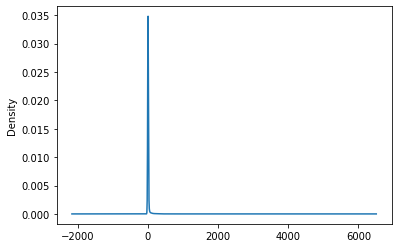

In [50]:
# Visualize the value counts of CLASSIFICATION
classification_type.plot.density()

In [56]:
# Split our preprocessed data into our features and target arrays
y = housing_test_df["median_listing_price"].values
X = housing_test_df.drop(["median_listing_price"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
housing_test_df.head()

,Month,Year,zip,lat,lng,population,density,median_listing_price,median_days_on_market,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,01,2020,21286,39.41374,-76.57375,19711.0,885.6,320000.0,30,182.0,1800.0,399248.0,51.0
1,01,2020,21286,39.41374,-76.57375,19711.0,885.6,280000.0,27,175.0,1600.0,368038.0,51.0
2,01,2020,21286,39.41374,-76.57375,19711.0,885.6,297450.0,23,174.0,1680.0,367193.0,62.0
3,01,2020,21286,39.41374,-76.57375,19711.0,885.6,305000.0,42,173.0,1736.0,370583.0,94.0
4,01,2020,21286,39.41374,-76.57375,19711.0,885.6,302500.0,44,173.0,1740.0,391833.0,93.0


In [57]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
X_train_scaled.shape

(584667, 12)

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1040      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [61]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [63]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
18271/18271 [==============================] - 32s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
18271/18271 [==============================] - 32s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
18271/18271 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
18271/18271 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
18256/18271 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints/weights.05.hdf5
18271/18271 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
18271/18271 [==============================] - 30s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
18271/18271 [==============================] - 30s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
18271/18271 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.0000e+00
E

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6091/6091 - 6s - loss: nan - accuracy: 0.0000e+00 - 6s/epoch - 957us/step
Loss: nan, Accuracy: 0.0


In [65]:
# Export our model to HDF5 file
from google.colab import files
nn.save("Listing_info.h5")
files.download("Listing_info.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>